## 期中考 - Enron Fraud Dataset 安隆公司詐欺案資料集
安隆公司曾是一間能源公司，2001 年破產前是世界上最大的電力、天然氣及電信公司之一。擁有上千億資產的公司於 2002 年竟然在短短幾周內宣告破產，才揭露其財報在多年以來均是造假的醜聞。在本資料集中你將會扮演偵探的角色，透過高層經理人內部的 mail 來往的情報以及薪資、股票等財務特徵，訓練出一個機器學習模型來幫忙你找到可疑的詐欺犯罪者是誰! 我們已經先幫你找到幾位犯罪者 (Person-of-Interest, poi) 與清白的員工，請利用這些訓練資料來訓練屬於自己的詐欺犯機器學習模型吧!


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read the dataset

data_path = './3rd-ml100marathon-midterm/'
enron_train = pd.read_csv(data_path + 'train_data.csv')
enron_test = pd.read_csv(data_path + 'test_features.csv')

In [3]:
enron_train.head()

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [4]:
enron_test.head()

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,BELDEN TIMOTHY N,5249999.0,2144013.0,-2334434.0,NaN,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,...,NaN,NaN,210698.0,157569.0,NaN,213999.0,5521.0,7991.0,5501630.0,1110705.0
1,BOWEN JR RAYMOND M,1350000.0,NaN,-833.0,NaN,raymond.bowen@enron.com,NaN,65907.0,27.0,140.0,...,NaN,974293.0,1621.0,252055.0,NaN,278601.0,1593.0,1858.0,2669589.0,252055.0
2,HANNON KEVIN P,1500000.0,NaN,-3117011.0,NaN,kevin.hannon@enron.com,5538001.0,34039.0,32.0,32.0,...,NaN,1617011.0,11350.0,853064.0,NaN,243293.0,1035.0,1045.0,288682.0,6391065.0
3,DELAINEY DAVID W,3000000.0,NaN,NaN,NaN,david.delainey@enron.com,2291113.0,86174.0,3069.0,66.0,...,NaN,1294981.0,1661.0,1323148.0,NaN,365163.0,2097.0,3093.0,4747979.0,3614261.0
4,CAUSEY RICHARD A,1000000.0,NaN,-235000.0,NaN,richard.causey@enron.com,NaN,30674.0,49.0,58.0,...,NaN,350000.0,307895.0,2502063.0,NaN,415189.0,1585.0,1892.0,1868758.0,2502063.0


/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:778: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


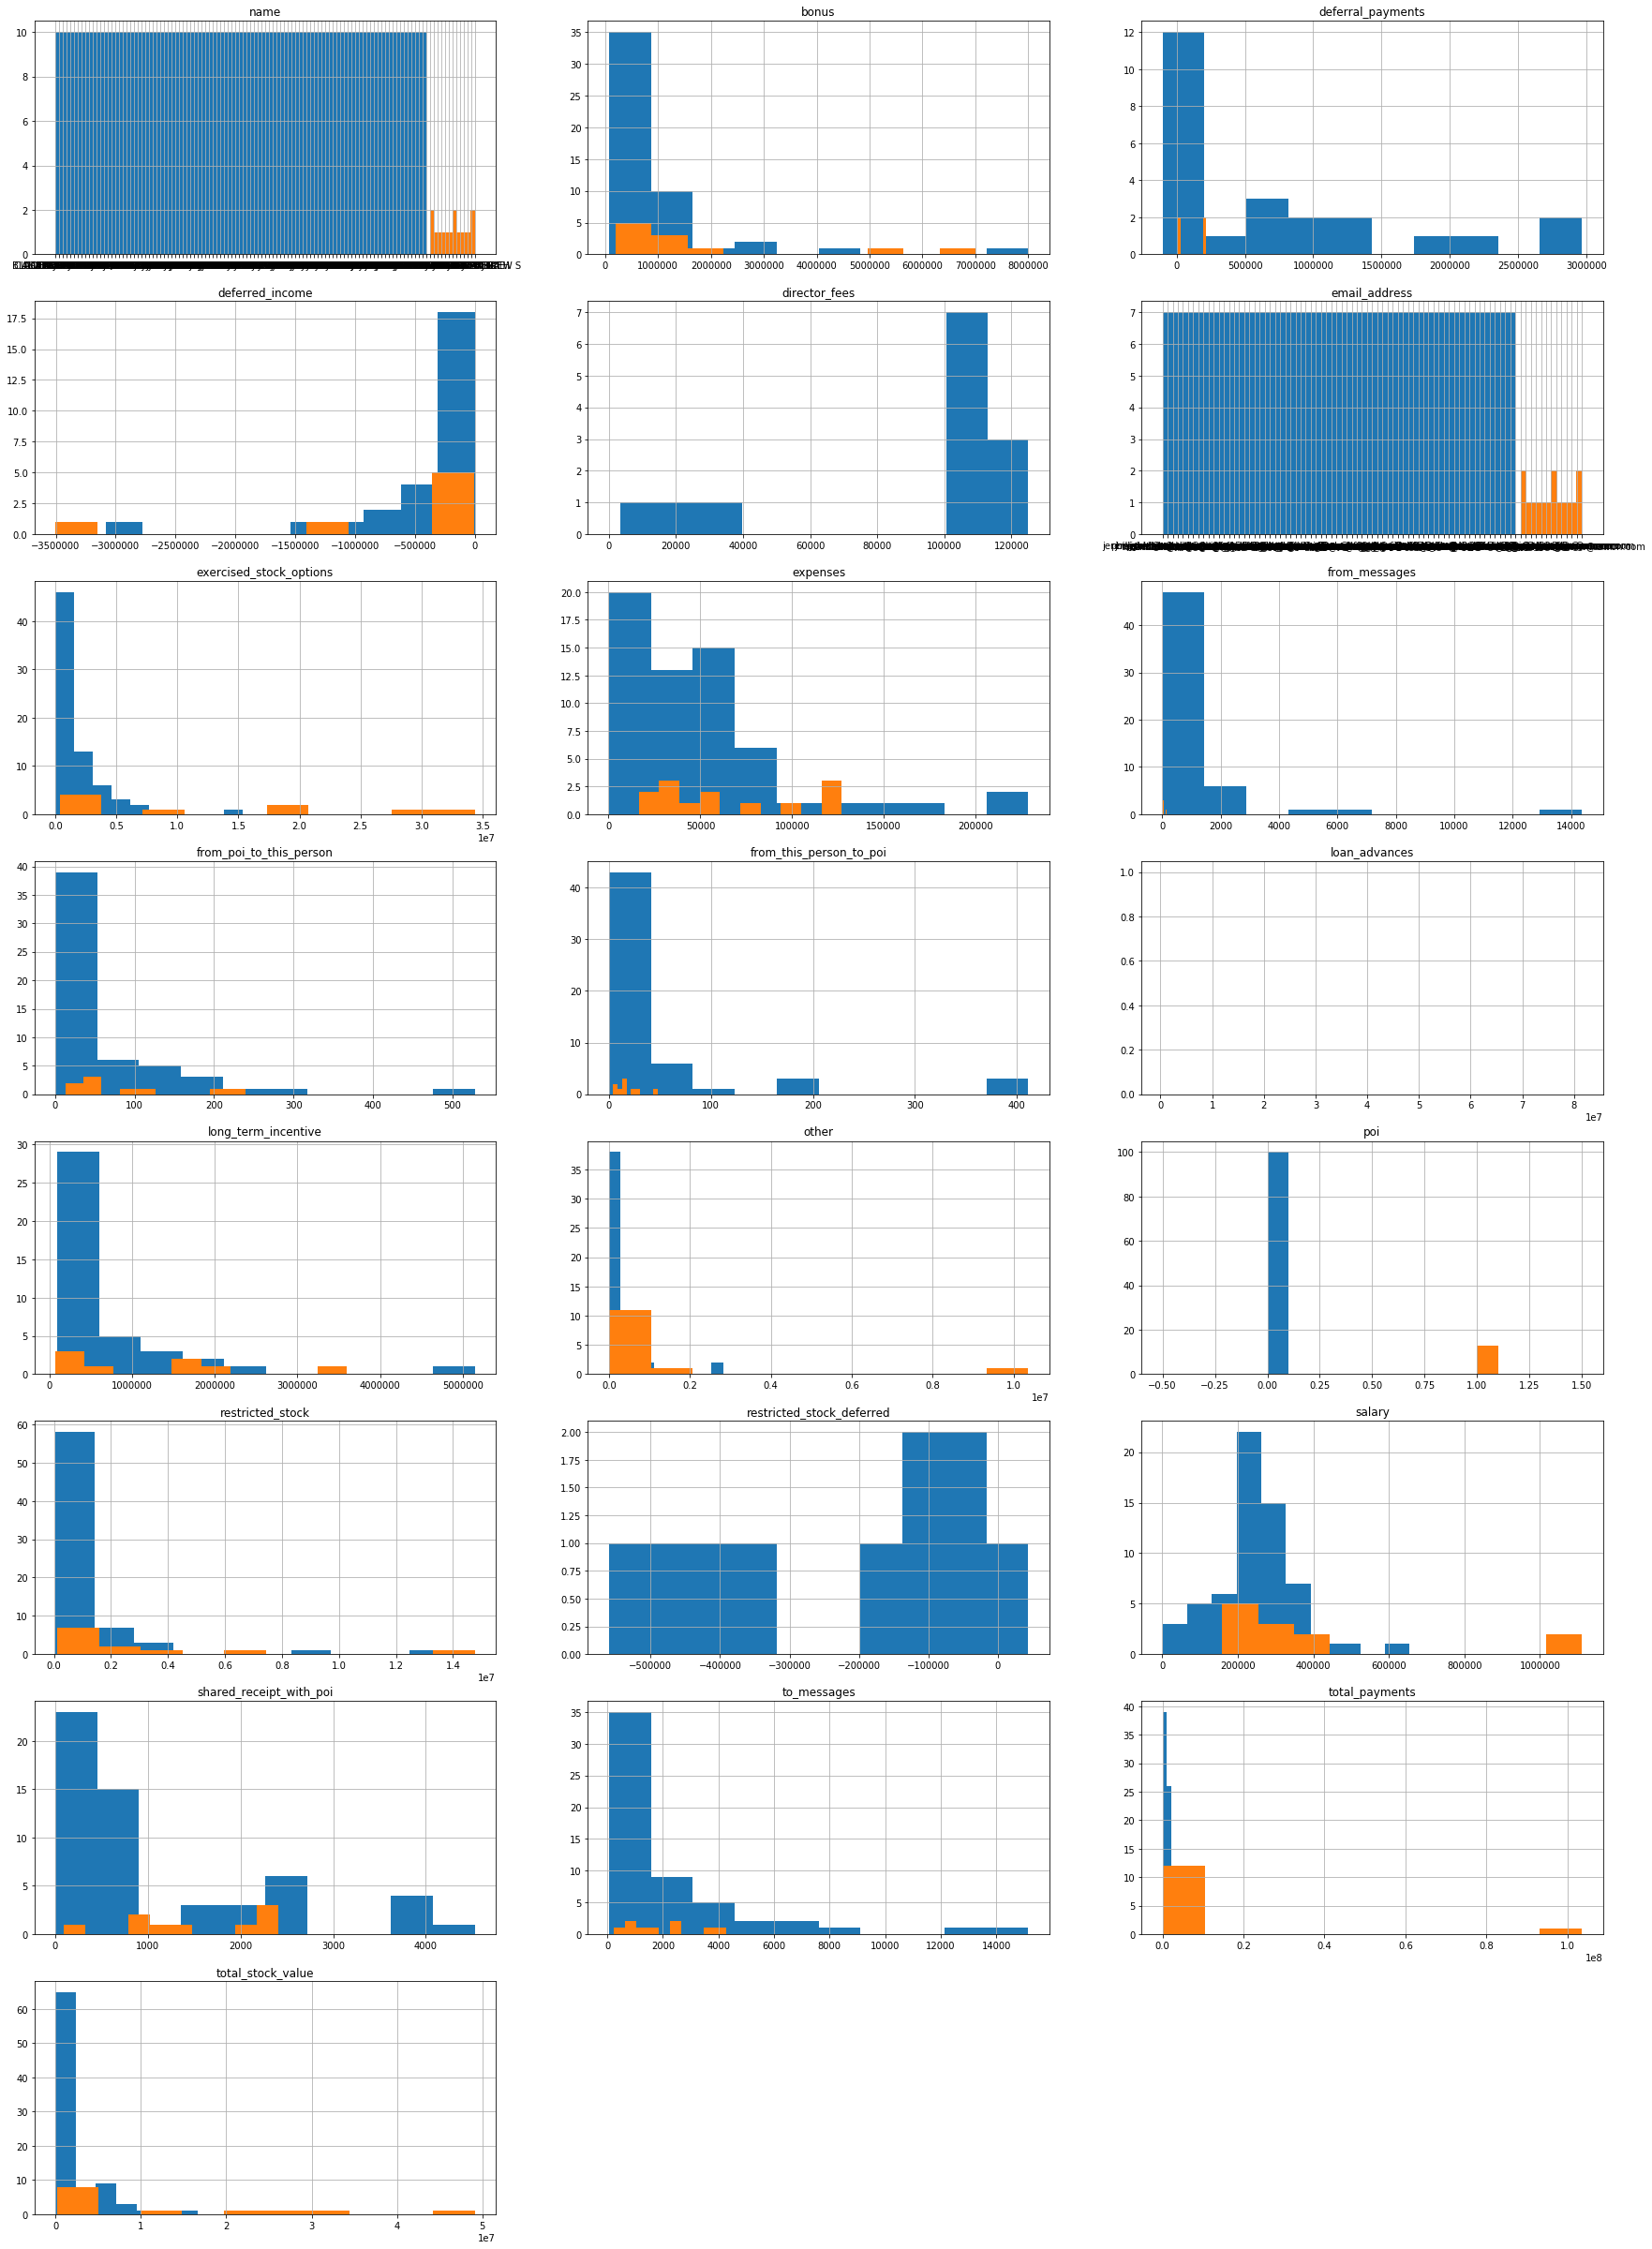

In [5]:
# show some figures
#enron_train.loc[(enron_train['poi'] == False)]
nrows = len(enron_train.columns)
ncols = nrows // 6
plt.figure(figsize=(30,120))
for i in range(nrows):
    plt.subplot(nrows, ncols, i+1)
    enron_train.loc[(enron_train['poi'] == False), enron_train.columns[i]].hist()
    enron_train.loc[(enron_train['poi'] == True), enron_train.columns[i]].hist()
    plt.title(str(enron_train.columns[i]))
plt.show() 

In [6]:
enron_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 22 columns):
name                         113 non-null object
bonus                        61 non-null float64
deferral_payments            28 non-null float64
deferred_income              34 non-null float64
director_fees                13 non-null float64
email_address                83 non-null object
exercised_stock_options      81 non-null float64
expenses                     73 non-null float64
from_messages                65 non-null float64
from_poi_to_this_person      65 non-null float64
from_this_person_to_poi      65 non-null float64
loan_advances                2 non-null float64
long_term_incentive          49 non-null float64
other                        69 non-null float64
poi                          113 non-null bool
restricted_stock             82 non-null float64
restricted_stock_deferred    10 non-null float64
salary                       73 non-null float64
shared_receipt_wi

In [7]:
train_Y = enron_train['poi'].astype(float) # make the poi from boolean into float
names = enron_test['name'] # for output purpose

# drop poi, name, email from dataset (non-float stuff)
enron_train = enron_train.drop(['poi', 'email_address', 'name'] , axis=1)
enron_test = enron_test.drop(['email_address', 'name'] , axis=1)

enron = pd.concat([enron_train, enron_test])
# fill the empty slots with zero
enron = enron.fillna(0)
enron.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 32
Data columns (total 19 columns):
bonus                        146 non-null float64
deferral_payments            146 non-null float64
deferred_income              146 non-null float64
director_fees                146 non-null float64
exercised_stock_options      146 non-null float64
expenses                     146 non-null float64
from_messages                146 non-null float64
from_poi_to_this_person      146 non-null float64
from_this_person_to_poi      146 non-null float64
loan_advances                146 non-null float64
long_term_incentive          146 non-null float64
other                        146 non-null float64
restricted_stock             146 non-null float64
restricted_stock_deferred    146 non-null float64
salary                       146 non-null float64
shared_receipt_with_poi      146 non-null float64
to_messages                  146 non-null float64
total_payments               146 non-null floa

In [8]:
# make everything 1 or 0
for col in enron:
    enron[col] = enron[col].apply(lambda x: 1 if abs(x)>0 else 0)
    
enron.head()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1,0,1,0,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1
1,1,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1
2,1,0,1,0,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1
3,1,0,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,1,1
4,1,0,1,0,0,1,1,1,1,0,1,1,1,0,1,1,1,1,1


In [9]:
enron.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.561644,0.267123,0.335616,0.116438,0.698630,0.650685,0.589041,0.506849,0.452055,0.027397,0.452055,0.636986,0.753425,0.123288,0.650685,0.589041,0.589041,0.856164,0.863014
std,0.497894,0.443980,0.473831,0.321854,0.460433,0.478395,0.493701,0.501674,0.499409,0.163800,0.499409,0.482524,0.432501,0.329899,0.478395,0.493701,0.493701,0.352131,0.345016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## data combinations

In [10]:
# bonus + deferred income
enron ['bonus_deferred_income'] = enron['bonus'] + enron['deferred_income']
enron = enron.drop(['bonus', 'deferred_income'], axis = 1)
        
enron.describe()

,deferral_payments,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,bonus_deferred_income
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.267123,0.116438,0.698630,0.650685,0.589041,0.506849,0.452055,0.027397,0.452055,0.636986,0.753425,0.123288,0.650685,0.589041,0.589041,0.856164,0.863014,0.897260
std,0.443980,0.321854,0.460433,0.478395,0.493701,0.501674,0.499409,0.163800,0.499409,0.482524,0.432501,0.329899,0.478395,0.493701,0.493701,0.352131,0.345016,0.749524
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [11]:
enron ['exchange_poi'] = enron['from_poi_to_this_person'] + enron['from_this_person_to_poi']
enron = enron.drop(['from_poi_to_this_person', 'from_this_person_to_poi'], axis = 1)

enron.describe()

,deferral_payments,director_fees,exercised_stock_options,expenses,from_messages,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,bonus_deferred_income,exchange_poi
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.267123,0.116438,0.698630,0.650685,0.589041,0.027397,0.452055,0.636986,0.753425,0.123288,0.650685,0.589041,0.589041,0.856164,0.863014,0.897260,0.958904
std,0.443980,0.321854,0.460433,0.478395,0.493701,0.163800,0.499409,0.482524,0.432501,0.329899,0.478395,0.493701,0.493701,0.352131,0.345016,0.749524,0.953228
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000


## start the learning attempt

In [12]:
# 將前述轉換完畢資料 enron , 重新切成 train_X, test_X
train_num = train_Y.shape[0]
train_X = enron[:train_num]
test_X = enron[train_num:]

In [13]:
# 使用三種模型 : 邏輯斯迴歸 / 梯度提升機 / 隨機森林, 參數使用 Random Search 尋找
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(C = 0.0001)
gdbt = GradientBoostingClassifier(tol=0.1, subsample=0.37, n_estimators=200, max_features=15, 
                                 max_depth=6, learning_rate=0.03)
rf = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=1, 
                            max_features='sqrt', max_depth=6, bootstrap=True)

In [14]:
# 線性迴歸預測檔 (結果有部分隨機, 請以 Kaggle 計算的得分為準, 以下模型同理)
lr.fit(train_X, train_Y)
lr_pred = lr.predict_proba(test_X)[:,1]
cross_val_score(lr, train_X, train_Y, cv=5).mean()

# no data combination - score: 0.8853754940711462
# combined bonus and deferred_income - score: 0.8853754940711462
# plus combined email exchanges to/from poi - score: 0.8853754940711462


#sub = pd.DataFrame({'name': names, 'poi': lr_pred})
#sub.to_csv('enron_lr.csv', index=False) 

/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

0.8853754940711462

In [17]:
# 梯度提升機預測檔 
gdbt.fit(train_X, train_Y)
gdbt_pred = gdbt.predict_proba(test_X)[:,1]
cross_val_score(gdbt, train_X, train_Y, cv=5).mean()

# no data combination - score: 0.849802371541502
# combined bonus and deferred_income - score: 0.8584980237154151
# plus combined email exchanges to/from poi - score: 0.8940711462450592 (Kaggle score: 0.93928)


#sub = pd.DataFrame({'name': names, 'poi': gdbt_pred})
#sub.to_csv('enron_gdbt.csv', index=False)

In [16]:
# 隨機森林預測檔
rf.fit(train_X, train_Y)
rf_pred = rf.predict_proba(test_X)[:,1]
cross_val_score(rf, train_X, train_Y, cv=5).mean()

# no data combination - score: 0.8853754940711462
# combined bonus and deferred_income - score: 0.9114624505928853 (Kaggle score: 0.90357)
# plus combined email exchanges to/from poi - score: 0.8940711462450592


#sub = pd.DataFrame({'name': names, 'poi': rf_pred})
#sub.to_csv('enron_rf.csv', index=False)

0.8940711462450592